## QBS108: MACHINE LEARNING

**HW3** 

Deepanshi Shokeen

**PART 1**

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.manifold import TSNE
import time

In [2]:
data = pd.read_csv('hw3_labeled_data.csv')
print(data.shape)
test = pd.read_csv('hw3_unlabeled_data.csv')
test = test.iloc[:,1:25]
print(test.shape)


# Getting labels and features for training data 
x=data.iloc[:,1:25]
y=data.iloc[:,-1]
print(x.shape)

(300, 26)
(100, 24)
(300, 24)


We are looking at the data of patients where the label is 1 or 0 i.e if the patient has kidney disease or not.

Some of the risk factors or causes can be, High blood pressure,  diabetes, race, obesity, older age, kidney structure or family history. From the above variables it would be interested to look at the feature age and if it plays an important role in predicting if the patient has kidney disease or not. Another important feature is 'rbc' etc.

EXPLORING THE DATA BELOW

In [3]:
data.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,300.000000,300.000000,300.000000,300.000000,300.0000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000
mean,50.990000,76.433333,1.017233,0.993333,0.4500,0.706667,0.776667,0.103333,0.050000,147.133333,...,38.646667,8642.000000,4.569667,0.346667,0.333333,0.066667,0.790000,0.17000,0.143333,0.606667
std,17.339514,13.121973,0.005697,1.300870,1.0854,0.456051,0.417176,0.304902,0.218309,80.246207,...,8.715217,3129.934659,1.020024,0.476704,0.472192,0.249861,0.407989,0.37626,0.350998,0.489306
min,2.000000,50.000000,1.005000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,22.000000,...,15.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,41.000000,70.000000,1.010000,0.000000,0.0000,0.000000,1.000000,0.000000,0.000000,99.000000,...,32.000000,6700.000000,3.800000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
50%,54.000000,80.000000,1.020000,0.000000,0.0000,1.000000,1.000000,0.000000,0.000000,120.000000,...,40.000000,8400.000000,4.600000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.0000,1.000000,1.000000,0.000000,0.000000,159.750000,...,45.000000,9825.000000,5.200000,1.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000
max,82.000000,140.000000,1.025000,5.000000,5.0000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
Unnamed: 0        300 non-null object
age               300 non-null int64
bp                300 non-null int64
sg                300 non-null float64
al                300 non-null int64
su                300 non-null int64
rbc               300 non-null int64
pc                300 non-null int64
pcc               300 non-null int64
ba                300 non-null int64
bgr               300 non-null int64
bu                300 non-null float64
sc                300 non-null float64
sod               300 non-null int64
pot               300 non-null float64
hemo              300 non-null float64
pcv               300 non-null int64
wc                300 non-null int64
rc                300 non-null float64
htn               300 non-null int64
dm                300 non-null int64
cad               300 non-null int64
appet             300 non-null int64
pe                300 non-null 

In [5]:
# Looking at missing data

total = x.isnull().sum().sort_values(ascending=False)
percent_1 = x.isnull().sum()/x.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
ane,0,0.0
pe,0,0.0
bp,0,0.0
sg,0,0.0
al,0,0.0


No Missing Data. We can continue with our analysis

### A)

Down below, I am exploring the data using Heat map for correlation

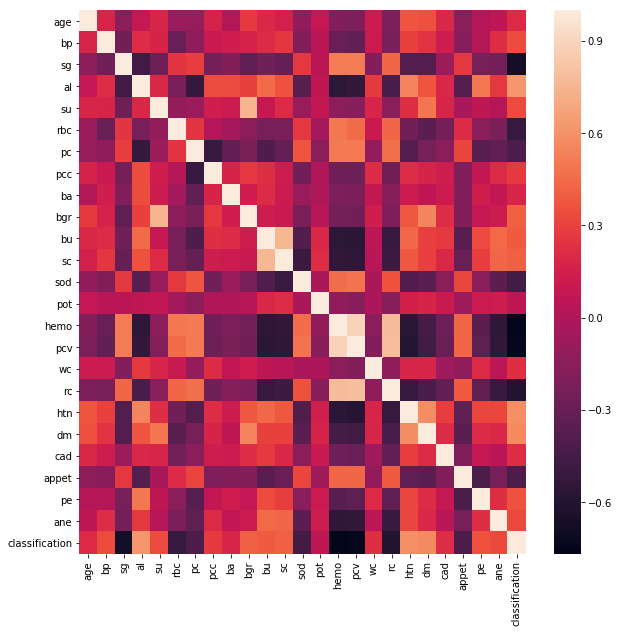

In [6]:
plt.figure(figsize=(10,10)) 
sns.heatmap(data.corr())

We can see that some features like 'sg', 'rbc', 'hemo', 'pcv' and 'rc' are negatively correlated to the classification.

Other features like 'al', 'bgr', 'htn' and 'dm' has high correlation and we can interpret them as important variables in our model.


We can also use selectKBest to look at important features


In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
kbest = SelectKBest(score_func=chi2, k=4)
fit = kbest.fit(x, y)

# Summarizing scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(x)

# Summarizing selected features
print(features[0:5,:])

[7.289e+01 7.940e+01 4.329e-03 1.932e+02 8.753e+01 2.368e+01 1.156e+01
 2.010e+01 9.725e+00 2.178e+03 1.626e+03 2.135e+02 2.098e+01 1.798e-01
 1.096e+02 3.219e+02 1.680e+04 2.519e+01 6.743e+01 6.484e+01 1.297e+01
 1.086e+01 3.307e+01 2.788e+01]
[[  165.    55.    40. 11800.]
 [  171.   153.    27.  9600.]
 [   92.    29.    32.  9600.]
 [   99.    38.    49.  8300.]
 [   88.    16.    53.  9100.]]


The important features from selectKbest library are 'age', 'bp', 'al', 'pcc' as they have the highest scores



The above is not used in analysis. This is just for purpose of data exploration 

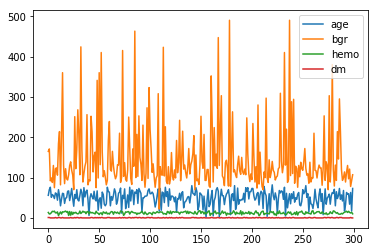

In [8]:
# Plotting all data 

data1 = data.loc[:,["age","bgr","hemo","dm"]]
data1.plot()

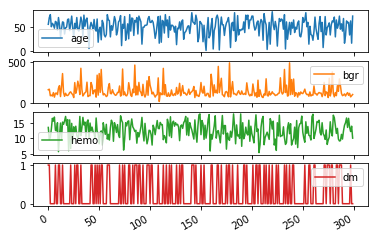

In [9]:
# Subplots

data1.plot(subplots = True)
plt.show()

We can also analyze our data through the histogram plots. The below diagram shows the histogram plot for one of the variables. We can do it for as many variables as we want.

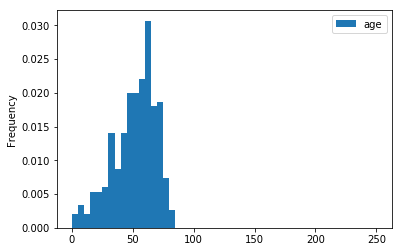

In [10]:
# Hist plot

data1.plot(kind = "hist",y = "age",bins = 50,range= (0,250),normed = True)

From the above histogram plot we can see that highest frequency is for age 60 in our data for patients

We can also classify our data for variables on the basis of classification, i.e if the person has kidney disease or not

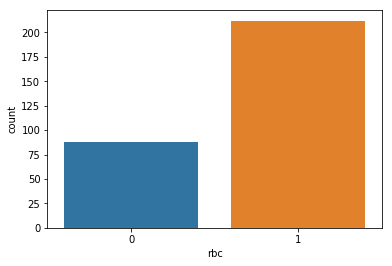

In [11]:
sns.countplot(data=x,x='rbc')
x['rbc'].fillna('normal',inplace=True)

### B)

Proposing the deep learning model development plan:- 
    1. Hidden layers:  Neural network consists of an input layer where it receives inputs and output layer where it outputs. The hidden layer is a layer which is hidden in between input and output layers.This is because the output of one layer is the input of another layer. We are asked to start with minimum of 5 layers at the least. We can specify the number of hidden neurons. The number of hidden neurons should usually be between the size of the input layer and the size of the output layer. 
    In the model below, I have used 5 hidden layers, input layer where I specified the input_dim as the no. of variables/features. For the output layer I have specified activation of sigmoid.
    
    2. Optimizer: I will try different optimizers like SGD, Adam, adagrad, RMSprop etc. I see that Adam is giving maximum accuracy, so I chose that for my optimizer. We can also play around with the Learning rate and betas values and see what value wuld increase the accuracy.
    lr: float >= 0. Learning rate.
    beta_1: float, 0 < beta < 1. Generally close to 1.
    beta_2: float, 0 < beta < 1. Generally close to 1.
    
    3. Regularization: I have tried Ridge regression/L2, we can also do early stopping. But in my model I am using dropout for the regularization as i find it more easy.
    
    4. Splitting: I have split the labeled data in to a training portion and a validation portion to check for the accueacy. The ratios I decided are 80 and 20 for train and val respectively. 
    
    5. Activation: We can also try different activation and play with them as in try using different activation function like- tanh, sigmoid, relu and chose which give us the best accuracy
    
    6. Loss- There also different functions for loss and we can chose any of them. I don't thInk it matters that much. I have used binary cross entropy. I could have also use MSE, or categorical entopy etc. 

**Example of ridge regression**

In [12]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(x,y)
# A helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

print ("Ridge model:", pretty_print_coefs(ridge.coef_))

Ridge model: -0.0 * X0 + 0.002 * X1 + -0.129 * X2 + 0.076 * X3 + 0.042 * X4 + -0.186 * X5 + 0.088 * X6 + 0.091 * X7 + -0.04 * X8 + 0.0 * X9 + -0.001 * X10 + 0.003 * X11 + -0.005 * X12 + -0.016 * X13 + -0.068 * X14 + -0.012 * X15 + 0.0 * X16 + 0.01 * X17 + 0.061 * X18 + 0.083 * X19 + -0.118 * X20 + -0.037 * X21 + 0.063 * X22 + -0.14 * X23


**But I wouldnt be using this for regularization. I'll be using dropout feature in my model as it is more easy to call**

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(x, y, test_size=0.2, random_state = 2) # 0.2 test_size means 20%
print(xtrain.shape, ytrain.shape)
print(xval.shape, yval.shape)

(240, 24) (240,)
(60, 24) (60,)


### C)

In [14]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, input_dim=24, activation='relu'))#input layer
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))#hidden layer
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))#hidden layer
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))#hidden layer
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))#hidden layer
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))#hidden layer
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))#hidden layer
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
#optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
optimizer=keras.optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy',  #can use 'mse' also 
              optimizer=optimizer,
              metrics=['accuracy'])
model.fit(xtrain, ytrain,
          epochs=50,
          batch_size=32)
score = model.evaluate(xval, yval, batch_size=32)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
240/240 [==============================] - 1s 3ms/step - loss: 0.7208 - acc: 0.5125
Epoch 2/50
240/240 [==============================] - 0s 134us/step - loss: 0.6940 - acc: 0.5083
Epoch 3/50
240/240 [==============================] - 0s 155us/step - loss: 0.6801 - acc: 0.5292
Epoch 4/50
240/240 [==============================] - 0s 142us/step - loss: 0.6631 - acc: 0.6083
Epoch 5/50
240/240 [==============================] - 0s 151us/step - loss: 0.6333 - acc: 0.6208
Epoch 6/50
240/240 [==============================] - 0s 150us/step - loss: 0.6029 - acc: 0.6333
Epoch 7/50
240/240 [==============================] - 0s 122us/step - loss: 0.5399 - acc: 0.6250
Epoch 8/50
240/240 [==============================] - 0s 130us/step - loss: 0.4471 - acc

Train on 192 samples, validate on 48 samples
Epoch 1/50
192/192 [==============================] - 0s 152us/step - loss: 0.0111 - acc: 0.9948 - val_loss: 7.4975e-06 - val_acc: 1.0000
Epoch 2/50
192/192 [==============================] - 0s 296us/step - loss: 0.0102 - acc: 0.9948 - val_loss: 6.0786e-06 - val_acc: 1.0000
Epoch 3/50
192/192 [==============================] - 0s 178us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 5.1193e-06 - val_acc: 1.0000
Epoch 4/50
192/192 [==============================] - 0s 155us/step - loss: 0.0857 - acc: 0.9896 - val_loss: 8.7289e-06 - val_acc: 1.0000
Epoch 5/50
192/192 [==============================] - 0s 195us/step - loss: 0.0052 - acc: 1.0000 - val_loss: 1.3371e-05 - val_acc: 1.0000
Epoch 6/50
192/192 [==============================] - 0s 171us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 1.5872e-05 - val_acc: 1.0000
Epoch 7/50
192/192 [==============================] - 0s 210us/step - loss: 0.0077 - acc: 0.9948 - val_loss: 2.0429e-05 - val_a

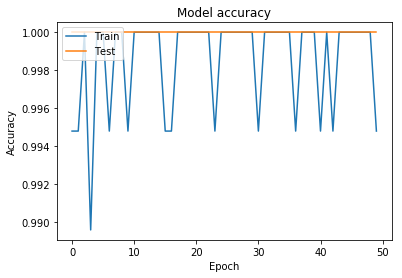

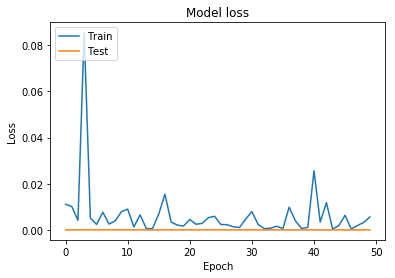

In [15]:
import matplotlib.pyplot as plt

history = model.fit(xtrain, ytrain, validation_split=0.20, epochs=50, batch_size=32, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### D)

In [16]:
from sklearn.metrics import confusion_matrix
predict=model.predict_classes(xval)
cm1 = confusion_matrix(yval,predict)
print('Confusion Matrix : \n', cm1)

Confusion Matrix : 
 [[24  0]
 [ 0 36]]


In [17]:
from sklearn.metrics import classification_report
print(classification_report(yval,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        36

   micro avg       1.00      1.00      1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [18]:
total1=sum(sum(cm1))

# From confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)
recall = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Recall : ', recall )# tpr, recall=tp/tp+fn
precision = cm1[0,0]/(cm1[0,0]+cm1[1,0])# tp/tp+fp
print('Precision : ', precision)
recall = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('True positive rate : ', recall )# tpr, recall=tp/tp+fn
fpr=cm1[1,0]/(cm1[1,0]+cm1[1,1])# fp/fp+tn
print('False positive rate : ', fpr)

Accuracy :  1.0
Recall :  1.0
Precision :  1.0
True positive rate :  1.0
False positive rate :  0.0


### E)

In [19]:
# Scaling the test data before prediction
test = scaler.fit_transform(test)
pred_test = model.predict_classes(test)
df = pd.DataFrame(pred_test)
df.columns =['classification']
df.head(3)

,classification
0,1
1,1
2,1


In [20]:
# Saving the output in .csv file 
df.to_csv('F003KYJ_prediction.csv', encoding='utf-8', index=False)

### PART 2

In [21]:
x=pd.read_csv('data.csv')
x=x.iloc[:,2:]
y=pd.read_csv('labels.csv')
y=y.iloc[:,1]
x.shape

(801, 20530)

In [22]:
time_start = time.time()
tsne_result=TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(x)
print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 801 samples in 0.471s...
[t-SNE] Computed neighbors for 801 samples in 21.138s...
[t-SNE] Computed conditional probabilities for sample 801 / 801
[t-SNE] Mean sigma: 48.192153
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.865620
[t-SNE] KL divergence after 300 iterations: 0.738668
t-SNE done! Time elapsed: 24.303140878677368 seconds


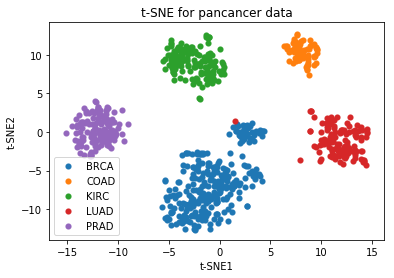

In [23]:
a=np.unique(y)
for i in a:
    xx=tsne_result[y==i,0]
    yy=tsne_result[y==i,1]
    plt.scatter (xx,yy,lw=0.1,label=i)
plt.title('t-SNE for pancancer data')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend()

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. 

We can see a LUAD(red dot) in BRCA (blue) cluster and one PRAD(purple dot) gene in BRCA. 
But overall, we see clear 5 clusters from the the first two t-SNE components. The t-SNE algorithm has thus been successful in clearly separating into 5 groups and mapping the multi-dimensional data to a lower dimensional space  